In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/yinagu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [11]:
# data source
obesity_url= "https://en.wikipedia.org/wiki/Obesity_in_the_United_States"

In [32]:
df_list = pd.io.html.read_html(obesity_url)
df = df_list[0]

In [33]:
df.columns=['state','obese_adults','overweight_adults','obese_child','rank']
df.drop(0, axis = 0, inplace=True)

In [34]:
df.head()

,state,obese_adults,overweight_adults,obese_child,rank
1,Alabama,30.1%,65.4%,16.7%,3
2,Alaska,27.3%,64.5%,11.1%,14
3,Arizona,23.3%,59.5%,12.2%,40
4,Arkansas,28.1%,64.7%,16.4%,9
5,California,23.1%,59.4%,13.2%,41


In [36]:
#df.obese_adults = [float(d.strip('%')) for d in df.obese_adults]
df.overweight_adults = [float(d.strip('%')) for d in df.overweight_adults]
df.obese_child = [float(d.strip('%')) for d in df.obese_child]

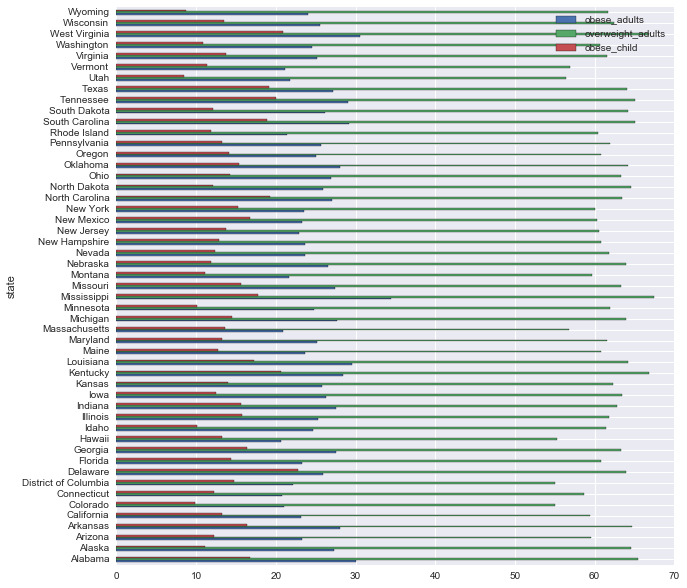

In [39]:
# Plot the obesity and overweight percent
df.plot(x='state', y=['obese_adults','overweight_adults','obese_child'], kind='barh',figsize=(10,10))

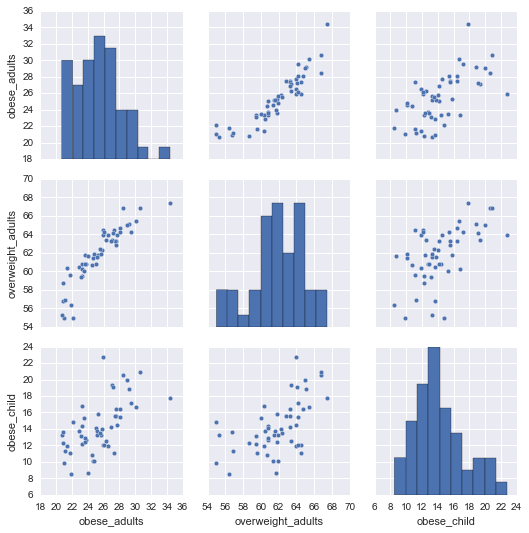

In [40]:
sns.pairplot(df[['obese_adults','overweight_adults','obese_child']])

In [41]:
# Obese and overweight in adults and children are highly correlated. Use average for comparison.
df['obesity_avg']=df[['obese_adults','overweight_adults','obese_child']].mean(axis=1)

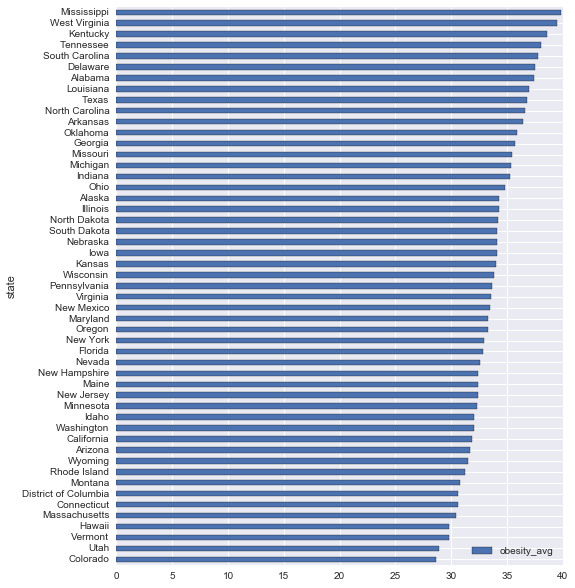

In [43]:
df.sort_values(by='obesity_avg').plot(x='state', y='obesity_avg', kind='barh', figsize=(8,10))